target = "loan_status"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
sns.set(style="white")#, rc={"axes.facecolor": (0, 0, 0, 0)})
%matplotlib inline

**"lending_club_info.xlsx"** file contains the information about the attribute columns

In [2]:
data_info = pd.read_excel("lending_club_info.xlsx",index_col='LoanStatNew')

### Data Overview

----
Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

In [3]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [4]:
feat_info('mort_acc')

Number of mortgage accounts.


The data can be downloaded from [https://www.kaggle.com/wendykan/lending-club-loan-data#loan.csv](https://www.kaggle.com/wendykan/lending-club-loan-data#loan.csv).

**change file path b4 posting**

In [5]:
df = pd.read_csv('lending_club_loan.csv')
data = df.copy()

In [6]:
%%time
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)

data

Wall time: 0 ns


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


june-2007 to dec-2016

---
# 1: Data PreProcessing

**Section Goals:** <br>
    Removing or filling any missing data. <br>
    Removing unnecessary or repetitive features.<br>
    Converting categorical string features to dummy variables.



In [7]:
org = len(data)
org

396030

In [8]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

**missing data in terms of percentage of the total DataFrame**

In [9]:
(100* (data.isnull().sum()/len(data)))

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [10]:
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**How many unique employment job titles are there?**

In [11]:
data['emp_title'].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

In [12]:
data['emp_title'].nunique()

173105

In [13]:
(data['emp_title'].value_counts())

Teacher                   4389
Manager                   4250
Registered Nurse          1856
RN                        1846
Supervisor                1830
                          ... 
Milton Roy Co.               1
St. Anthony's Hospital       1
Caine & Wiener               1
vista site eyecare           1
hudson valley ddso           1
Name: emp_title, Length: 173105, dtype: int64

**Realistically there are too many unique job titles to try to convert this to a dummy variable feature. So, removing that emp_title column.**

In [14]:
data = data.drop('emp_title',axis=1)

**Creating a count plot of the emp_length feature column and Sort the order of the values.**

In [15]:
data['emp_length'].isna().sum()

18301

creating a separate dataframe and removing the rows with null values of emp_length for further analysis to decide the necessity of this column, and how to fill the missing data.

In [16]:
data1 = data[(data['emp_length'].isna())==False] 

In [17]:
data1['emp_length'].isna().sum()

0

In [18]:
sorted(data1['emp_length'].unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [19]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

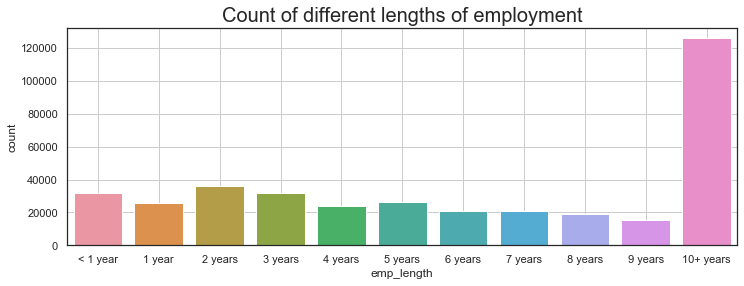

In [20]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length', data=data1, order=emp_length_order)
plt.title('Count of different lengths of employment', fontsize=20)
plt.grid('on')
plt.show()

**Plot out the countplot with a hue separating Fully Paid vs Charged Off**

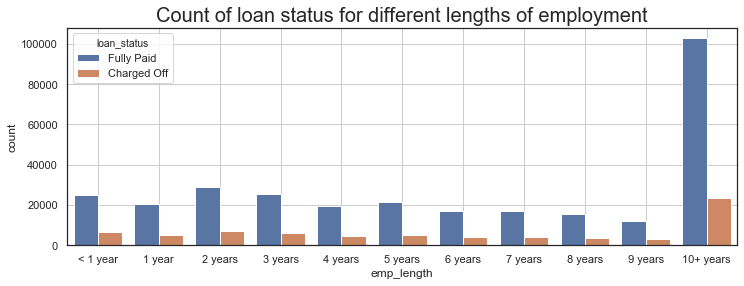

In [21]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')
plt.title('Count of loan status for different lengths of employment', fontsize=20)
plt.grid('on')
plt.show()

**This still doesn't really inform if there is a strong relationship between employment length and being charged off, what is needed is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multiple ways to create this Series. Once its created, lets visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html).**

In [22]:
def highlight_cols(s):
    color = 'yellow'
    return 'background-color: %s' % color

**Count of "Charged off" loans for each category of employment length**

In [23]:
data1[data1['loan_status']=="Charged Off"].groupby("emp_length").count().style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['loan_status']])

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
emp_length,,,,,,,,,,,,,,,,,,,,,,,,,
1 year,5154,5154,5154,5154,5154,5154,5154,5154,5154,5154,5154,5154,5131,5154,5154,5154,5154,5154,5148,5154,5154,5154,4732,5141,5154
10+ years,23215,23215,23215,23215,23215,23215,23215,23215,23215,23215,23215,23215,23109,23215,23215,23215,23215,23215,23200,23215,23215,23215,21883,23198,23215
2 years,6924,6924,6924,6924,6924,6924,6924,6924,6924,6924,6924,6924,6900,6924,6924,6924,6924,6924,6918,6924,6924,6924,6383,6916,6924
3 years,6182,6182,6182,6182,6182,6182,6182,6182,6182,6182,6182,6182,6150,6182,6182,6182,6182,6182,6179,6182,6182,6182,5660,6179,6182
4 years,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4586,4608,4608,4608,4608,4608,4603,4608,4608,4608,4140,4598,4608
5 years,5092,5092,5092,5092,5092,5092,5092,5092,5092,5092,5092,5092,5073,5092,5092,5092,5092,5092,5088,5092,5092,5092,4666,5090,5092
6 years,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943,3931,3943,3943,3943,3943,3943,3942,3943,3943,3943,3639,3940,3943
7 years,4055,4055,4055,4055,4055,4055,4055,4055,4055,4055,4055,4055,4045,4055,4055,4055,4055,4055,4052,4055,4055,4055,3770,4052,4055
8 years,3829,3829,3829,3829,3829,3829,3829,3829,3829,3829,3829,3829,3822,3829,3829,3829,3829,3829,3823,3829,3829,3829,3609,3826,3829


**Count of "Fully Paid" loans for each category of employment length**

In [24]:
data1[data1['loan_status']=="Fully Paid"].groupby("emp_length").count().style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['loan_status']])

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
emp_length,,,,,,,,,,,,,,,,,,,,,,,,,
1 year,20728,20728,20728,20728,20728,20728,20728,20728,20728,20728,20728,20728,20603,20728,20728,20728,20728,20728,20712,20728,20728,20728,18126,20666,20728
10+ years,102826,102826,102826,102826,102826,102826,102826,102826,102826,102826,102826,102826,102326,102826,102826,102826,102826,102826,102766,102826,102826,102826,95511,102753,102826
2 years,28903,28903,28903,28903,28903,28903,28903,28903,28903,28903,28903,28903,28782,28903,28903,28903,28903,28903,28886,28903,28903,28903,25355,28848,28903
3 years,25483,25483,25483,25483,25483,25483,25483,25483,25483,25483,25483,25483,25386,25483,25483,25483,25483,25483,25468,25483,25483,25483,22220,25437,25483
4 years,19344,19344,19344,19344,19344,19344,19344,19344,19344,19344,19344,19344,19274,19344,19344,19344,19344,19344,19333,19344,19344,19344,16526,19321,19344
5 years,21403,21403,21403,21403,21403,21403,21403,21403,21403,21403,21403,21403,21320,21403,21403,21403,21403,21403,21391,21403,21403,21403,18691,21381,21403
6 years,16898,16898,16898,16898,16898,16898,16898,16898,16898,16898,16898,16898,16857,16898,16898,16898,16898,16898,16884,16898,16898,16898,15002,16878,16898
7 years,16764,16764,16764,16764,16764,16764,16764,16764,16764,16764,16764,16764,16718,16764,16764,16764,16764,16764,16747,16764,16764,16764,15284,16751,16764
8 years,15339,15339,15339,15339,15339,15339,15339,15339,15339,15339,15339,15339,15286,15339,15339,15339,15339,15339,15327,15339,15339,15339,14142,15323,15339


In [25]:
emp_co = data1[data1['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [26]:
emp_fp = data[data['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [27]:
emp_len = emp_co/emp_fp

In [28]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

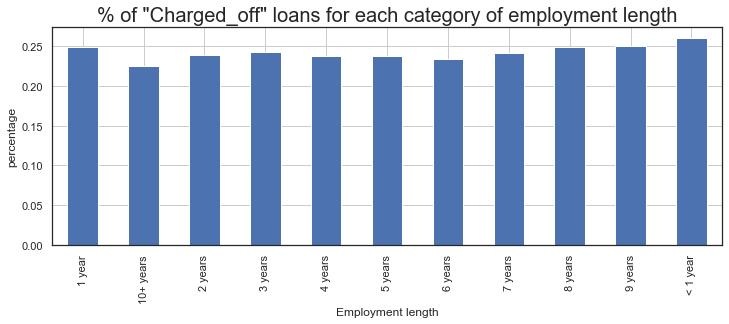

In [29]:
emp_len.plot(kind='bar', figsize=(12,4))
plt.title('% of "Charged_off" loans for each category of employment length', fontsize=20)
plt.ylabel('percentage')
plt.xlabel('Employment length')
plt.grid('on')
plt.show()

**Charge off rates are extremely similar across all employment lengths. So it is better to drop the emp_length column from the original dataframe "data".**

In [30]:
data = data.drop('emp_length',axis=1)

**Revisiting the DataFrame to see what feature columns still have missing data.**

In [31]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

**Checking title column vs the purpose column for repeated information.**

In [32]:
data['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [33]:
data['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**The title column is simply a string subcategory/description of the purpose column, so it is better to drop the title column.**

In [34]:
data = data.drop('title',axis=1)

In [35]:
data.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

**Now the mort_acc (mortgage accounts) has the most number of missing values.** <br>

In [36]:
feat_info('mort_acc')

Number of mortgage accounts.


In [37]:
data['mort_acc']

0         0.0
1         3.0
2         0.0
3         0.0
4         1.0
         ... 
396025    0.0
396026    1.0
396027    0.0
396028    5.0
396029    NaN
Name: mort_acc, Length: 396030, dtype: float64

**a value_counts plot of the mort_acc column.**

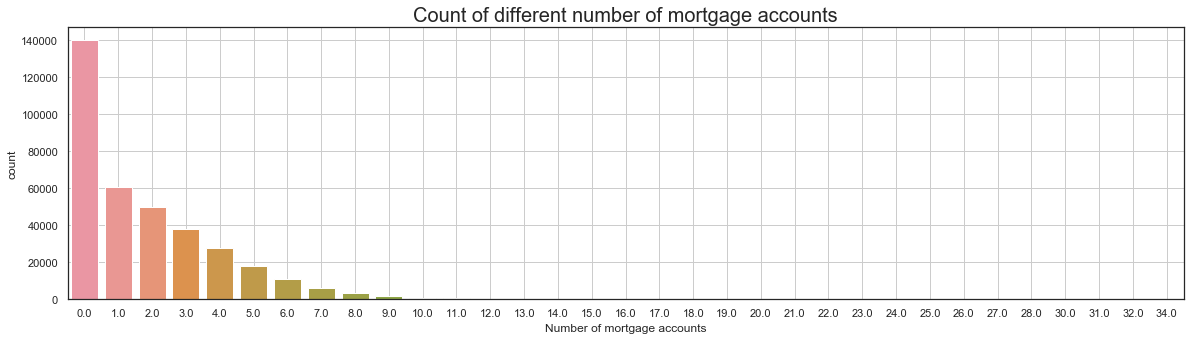

In [38]:
plt.figure(figsize=(20,5))
sns.countplot(x='mort_acc', data=data)
plt.title('Count of different number of mortgage accounts', fontsize=20)
plt.xlabel('Number of mortgage accounts')
plt.grid("on")
plt.show()

**There are many ways to deal with this missing data: <br>
One way is to build a simple model to fill it in, such as a linear model,<br>
Else it can be filled in based on the mean of the other columns,<br> 
even the columns can be binned into categories and then set NaN as its own category.<br>
There is no 100% correct approach! Let's review the other columns to see which most highly correlates to mort_acc**

In [39]:
print("Correlation with the mort_acc column")
data.corr()['mort_acc'].sort_values()

Correlation with the mort_acc column


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**Looks like the total_acc feature correlates with the mort_acc, this makes sense! Let's try this fillna() approach. Lets, group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry.**

In [40]:
np.sort(data['total_acc'].unique())

array([  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
        24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,
        35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,
        46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,
        57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,
        68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,
        79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,
        90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.,
       101., 102., 103., 104., 105., 106., 107., 108., 110., 111., 115.,
       116., 117., 118., 124., 129., 135., 150., 151.])

In [41]:
data['mort_acc'].unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

In [42]:
print("Mean of mort_acc column per total_acc")
pd.DataFrame(data.groupby('total_acc').mean()['mort_acc'])

Mean of mort_acc column per total_acc


,mort_acc
total_acc,
2.0,0.000000
3.0,0.052023
4.0,0.066743
5.0,0.103289
6.0,0.151293
...,...
124.0,1.000000
129.0,1.000000
135.0,3.000000


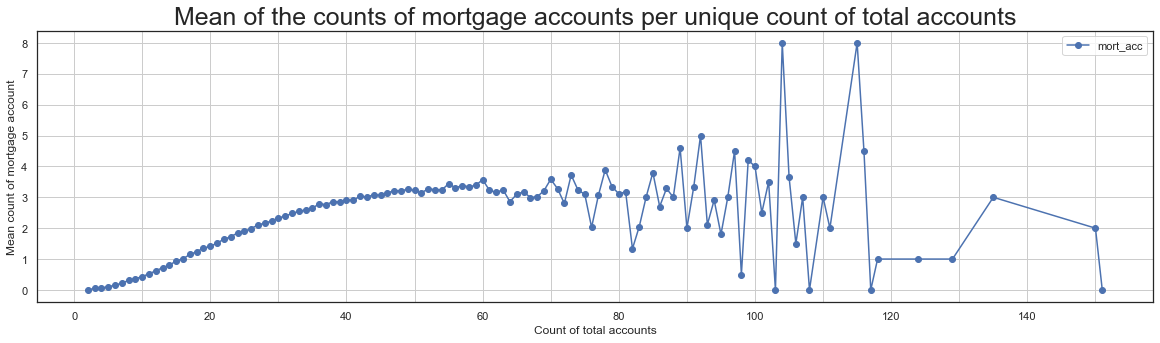

In [43]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

data.groupby('total_acc').mean()['mort_acc'].plot(marker='o')

spacingx = 10
spacingy = 1
minorLocatorx = MultipleLocator(spacingx)
minorLocatory = MultipleLocator(spacingy)
ax.yaxis.set_minor_locator(minorLocatory)
ax.xaxis.set_minor_locator(minorLocatorx)
ax.grid(which = 'minor')
ax.grid(which = 'major')
plt.title('Mean of the counts of mortgage accounts per unique count of total accounts', fontsize=25)
plt.ylabel("Mean count of mortgage account")
plt.xlabel("Count of total accounts")
#plt.legend(bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))
plt.legend()
plt.show()

**It can be seen, if the total number of accounts is approximately 105 and 115, then the number of mortgage accounts is highest(8) by mean.**

**Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then it will be filled in with the mean value corresponding to its total_acc value from the Series that has been created above. This involves using an .apply() method with two columns.**

[Helpful Link](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe) 

In [44]:
total_acc_avg = data.groupby('total_acc').mean()['mort_acc']

In [45]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [46]:
%%time
data['mort_acc'] = data.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

Wall time: 29.8 s


In [47]:
data.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
dtype: int64

**revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Hence, it is convenient to remove the rows that are missing those values in those columns with dropna().**

In [48]:
data = data.dropna()

In [49]:
data.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [50]:
print('Now length of dataframe = ', (len(data)))
print('Previous length =', org)
print('Dataframe length reduced by after solving all missing value instances = ', (org - len(data)))

Now length of dataframe =  395219
Previous length = 396030
Dataframe length reduced by after solving all missing value instances =  811


**Finally the dataframe is free of missing values.**

## Categorical Variables and Dummy Variables

**Now it is needed to deal with the string values due to the categorical columns.**

**Listing all the columns that are currently non-numeric. [Helpful Link](https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type)**

[Another very useful method call](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [51]:
data.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what should be done with them.**

---
### term feature

**Converting the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [52]:
data['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [53]:
data.head(3).style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['term']])

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.000000,36 months,11.440000,329.480000,B,B4,RENT,117000.000000,Not Verified,Jan-2015,Fully Paid,vacation,26.240000,Jun-1990,16.000000,0.000000,36369.000000,41.800000,25.000000,w,INDIVIDUAL,0.000000,0.000000,"0174 Michelle Gateway Mendozaberg, OK 22690"
1,8000.000000,36 months,11.990000,265.680000,B,B5,MORTGAGE,65000.000000,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.050000,Jul-2004,17.000000,0.000000,20131.000000,53.300000,27.000000,f,INDIVIDUAL,3.000000,0.000000,"1076 Carney Fort Apt. 347 Loganmouth, SD 05113"
2,15600.000000,36 months,10.490000,506.970000,B,B3,RENT,43057.000000,Source Verified,Jan-2015,Fully Paid,credit_card,12.790000,Aug-2007,13.000000,0.000000,11987.000000,92.200000,26.000000,f,INDIVIDUAL,0.000000,0.000000,"87025 Mark Dale Apt. 269 New Sabrina, WV 05113"


In [54]:
%%time
data['term'] = data['term'].apply(lambda term: int(term[:3]))

Wall time: 676 ms


In [55]:
data.head(10).style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['term']])

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.000000,36,11.440000,329.480000,B,B4,RENT,117000.000000,Not Verified,Jan-2015,Fully Paid,vacation,26.240000,Jun-1990,16.000000,0.000000,36369.000000,41.800000,25.000000,w,INDIVIDUAL,0.000000,0.000000,"0174 Michelle Gateway Mendozaberg, OK 22690"
1,8000.000000,36,11.990000,265.680000,B,B5,MORTGAGE,65000.000000,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.050000,Jul-2004,17.000000,0.000000,20131.000000,53.300000,27.000000,f,INDIVIDUAL,3.000000,0.000000,"1076 Carney Fort Apt. 347 Loganmouth, SD 05113"
2,15600.000000,36,10.490000,506.970000,B,B3,RENT,43057.000000,Source Verified,Jan-2015,Fully Paid,credit_card,12.790000,Aug-2007,13.000000,0.000000,11987.000000,92.200000,26.000000,f,INDIVIDUAL,0.000000,0.000000,"87025 Mark Dale Apt. 269 New Sabrina, WV 05113"
3,7200.000000,36,6.490000,220.650000,A,A2,RENT,54000.000000,Not Verified,Nov-2014,Fully Paid,credit_card,2.600000,Sep-2006,6.000000,0.000000,5472.000000,21.500000,13.000000,f,INDIVIDUAL,0.000000,0.000000,"823 Reid Ford Delacruzside, MA 00813"
4,24375.000000,60,17.270000,609.330000,C,C5,MORTGAGE,55000.000000,Verified,Apr-2013,Charged Off,credit_card,33.950000,Mar-1999,13.000000,0.000000,24584.000000,69.800000,43.000000,f,INDIVIDUAL,1.000000,0.000000,"679 Luna Roads Greggshire, VA 11650"
5,20000.000000,36,13.330000,677.070000,C,C3,MORTGAGE,86788.000000,Verified,Sep-2015,Fully Paid,debt_consolidation,16.310000,Jan-2005,8.000000,0.000000,25757.000000,100.600000,23.000000,f,INDIVIDUAL,4.000000,0.000000,"1726 Cooper Passage Suite 129 North Deniseberg, DE 30723"
6,18000.000000,36,5.320000,542.070000,A,A1,MORTGAGE,125000.000000,Source Verified,Sep-2015,Fully Paid,home_improvement,1.360000,Aug-2005,8.000000,0.000000,4178.000000,4.900000,25.000000,f,INDIVIDUAL,3.000000,0.000000,"1008 Erika Vista Suite 748 East Stephanie, TX 22690"
7,13000.000000,36,11.140000,426.470000,B,B2,RENT,46000.000000,Not Verified,Sep-2012,Fully Paid,credit_card,26.870000,Sep-1994,11.000000,0.000000,13425.000000,64.500000,15.000000,f,INDIVIDUAL,0.000000,0.000000,USCGC Nunez FPO AE 30723
8,18900.000000,60,10.990000,410.840000,B,B3,RENT,103000.000000,Verified,Oct-2014,Fully Paid,debt_consolidation,12.520000,Jun-1994,13.000000,0.000000,18637.000000,32.900000,40.000000,w,INDIVIDUAL,3.000000,0.000000,USCGC Tran FPO AP 22690
9,26300.000000,36,16.290000,928.400000,C,C5,MORTGAGE,115000.000000,Verified,Apr-2012,Fully Paid,debt_consolidation,23.690000,Dec-1997,13.000000,0.000000,22171.000000,82.400000,37.000000,f,INDIVIDUAL,1.000000,0.000000,"3390 Luis Rue Mauricestad, VA 00813"


### grade feature

**It is already known grade is part of sub_grade, so I will just drop the grade feature.**

In [56]:
data = data.drop('grade',axis=1)

**lets, convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. The original subgrade column has to be dropped by adding drop_first=True to the get_dummies call.**

In [57]:
subgrade_dummies = pd.get_dummies(data['sub_grade'],drop_first=True)

In [58]:
data = pd.concat([data.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [59]:
(data.columns.to_series().groupby(data.dtypes).groups)

{dtype('uint8'): Index(['A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3',
        'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5',
        'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
       dtype='object'),
 dtype('int64'): Index(['term'], dtype='object'),
 dtype('float64'): Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
        'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
        'pub_rec_bankruptcies'],
       dtype='object'),
 dtype('O'): Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
        'purpose', 'earliest_cr_line', 'initial_list_status',
        'application_type', 'address'],
       dtype='object')}

In [60]:
data.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type, initial_list_status, purpose 
**I will convert these columns: ['verification_status', 'application_type', 'initial_list_status', 'purpose'] into dummy variables and then concatenate them with the original dataframe and drop the original columns by setting drop_first=True.**

In [61]:
dummies = pd.get_dummies(data[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
data = data.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
data = pd.concat([data,dummies],axis=1)

### home_ownership
**Reviewing the value_counts for the home_ownership column.**

In [62]:
data['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**Converting these to dummy variables, and replacing (by [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)) "NONE" and "ANY" with OTHER, so that there remains just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenating them with the original dataframe.**

In [63]:
data['home_ownership']=data['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(data['home_ownership'],drop_first=True)
data = data.drop('home_ownership',axis=1)
data = pd.concat([data,dummies],axis=1)

### address
**Let's feature engineer a zip code column from the address in the data set. Creating a column called 'zip_code' that extracts the zip code from the address column.**

In [64]:
data['address'][2][-5:-1]

'0511'

In [65]:
data['zip_code'] = data['address'].apply(lambda address:address[-5:])

In [66]:
dummies = pd.get_dummies(data['zip_code'],drop_first=True)
data = data.drop(['zip_code','address'],axis=1)
data = pd.concat([data,dummies],axis=1)

### issue_d 

**This would be data leakage, as it is not known beforehand whether or not a loan would be issued when using our model, so in theory it is not required to have an issue_date,so lets drop this feature.**

In [67]:
data = data.drop('issue_d',axis=1)

### earliest_cr_line
**This appears to be a historical time stamp feature. Extracting the year from this feature using a .apply function, then converting it to a numeric feature. Setting this new data to a feature column called 'earliest_cr_year', then dropping the earliest_cr_line feature.**

In [68]:
data['earliest_cr_year'] = data['earliest_cr_line'].apply(lambda date:int(date[-4:]))
data = data.drop('earliest_cr_line',axis=1)

In [69]:
data.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [70]:
data

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,16.0,0.0,36369.0,41.8,25.0,0.000000,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,17.0,0.0,20131.0,53.3,27.0,3.000000,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,13.0,0.0,11987.0,92.2,26.0,0.000000,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,6.0,0.0,5472.0,21.5,13.0,0.000000,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,13.0,0.0,24584.0,69.8,43.0,1.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,Fully Paid,15.63,6.0,0.0,1990.0,34.3,23.0,0.000000,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2004
396026,21000.0,36,12.29,700.42,110000.0,Fully Paid,21.45,6.0,0.0,43263.0,95.7,8.0,1.000000,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2006
396027,5000.0,36,9.99,161.32,56500.0,Fully Paid,17.56,15.0,0.0,32704.0,66.9,23.0,0.000000,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1997
396028,21000.0,60,15.31,503.02,64000.0,Fully Paid,15.88,9.0,0.0,15704.0,53.8,20.0,5.000000,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1990
